In [2]:
import pandas as pd 
from sklearn.model_selection import train_test_split
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_auc_score, roc_curve

In [3]:
dataset = pd.read_csv("Loan.csv")

print(dataset.dtypes)

ApplicationDate                object
Age                             int64
AnnualIncome                    int64
CreditScore                     int64
EmploymentStatus               object
EducationLevel                 object
Experience                      int64
LoanAmount                      int64
LoanDuration                    int64
MaritalStatus                  object
NumberOfDependents              int64
HomeOwnershipStatus            object
MonthlyDebtPayments             int64
CreditCardUtilizationRate     float64
NumberOfOpenCreditLines         int64
NumberOfCreditInquiries         int64
DebtToIncomeRatio             float64
BankruptcyHistory               int64
LoanPurpose                    object
PreviousLoanDefaults            int64
PaymentHistory                  int64
LengthOfCreditHistory           int64
SavingsAccountBalance           int64
CheckingAccountBalance          int64
TotalAssets                     int64
TotalLiabilities                int64
MonthlyIncom

In [4]:
label_encoder = LabelEncoder()

dataset_encoded = pd.get_dummies(dataset, columns=['EmploymentStatus', 'HomeOwnershipStatus', 'MaritalStatus', 'LoanPurpose'], drop_first=True)

dataset_encoded['EducationLevel'] = label_encoder.fit_transform(dataset_encoded['EducationLevel'])

print(dataset_encoded.dtypes)

ApplicationDate                    object
Age                                 int64
AnnualIncome                        int64
CreditScore                         int64
EducationLevel                      int32
Experience                          int64
LoanAmount                          int64
LoanDuration                        int64
NumberOfDependents                  int64
MonthlyDebtPayments                 int64
CreditCardUtilizationRate         float64
NumberOfOpenCreditLines             int64
NumberOfCreditInquiries             int64
DebtToIncomeRatio                 float64
BankruptcyHistory                   int64
PreviousLoanDefaults                int64
PaymentHistory                      int64
LengthOfCreditHistory               int64
SavingsAccountBalance               int64
CheckingAccountBalance              int64
TotalAssets                         int64
TotalLiabilities                    int64
MonthlyIncome                     float64
UtilityBillsPaymentHistory        

In [5]:
X = dataset_encoded.drop(columns=['RiskScore', 'ApplicationDate'])
y = dataset_encoded['RiskScore']

In [6]:
dataset2 = dataset_encoded.copy()

quartis = dataset2['RiskScore'].quantile([0.25, 0.5, 0.75]).values

limites = [-float('inf'), quartis[0], quartis[1], quartis[2], float('inf')]
categorias = ['Baixo', 'Médio', 'Alto', 'Muito Alto']

dataset2['Categoria'] = pd.cut(dataset2['RiskScore'], bins=limites, labels=categorias)


In [7]:
label_encoder = LabelEncoder()

dataset2['Categoria'] = label_encoder.fit_transform(dataset2['Categoria'])

print(dataset2.dtypes)

ApplicationDate                    object
Age                                 int64
AnnualIncome                        int64
CreditScore                         int64
EducationLevel                      int32
Experience                          int64
LoanAmount                          int64
LoanDuration                        int64
NumberOfDependents                  int64
MonthlyDebtPayments                 int64
CreditCardUtilizationRate         float64
NumberOfOpenCreditLines             int64
NumberOfCreditInquiries             int64
DebtToIncomeRatio                 float64
BankruptcyHistory                   int64
PreviousLoanDefaults                int64
PaymentHistory                      int64
LengthOfCreditHistory               int64
SavingsAccountBalance               int64
CheckingAccountBalance              int64
TotalAssets                         int64
TotalLiabilities                    int64
MonthlyIncome                     float64
UtilityBillsPaymentHistory        

In [8]:
X = dataset2.drop(columns=['Categoria', 'ApplicationDate','RiskScore'])
y= dataset2['Categoria']

print(dataset2)

      ApplicationDate  Age  AnnualIncome  CreditScore  EducationLevel  \
0          2018-01-01   45         39948          617               4   
1          2018-01-02   38         39709          628               0   
2          2018-01-03   47         40724          570               1   
3          2018-01-04   58         69084          545               3   
4          2018-01-05   37        103264          594               0   
...               ...  ...           ...          ...             ...   
19995      2072-09-29   44         30180          587               3   
19996      2072-09-30   56         49246          567               0   
19997      2072-10-01   44         48958          645               1   
19998      2072-10-02   60         41025          560               3   
19999      2072-10-03   20         53227          574               0   

       Experience  LoanAmount  LoanDuration  NumberOfDependents  \
0              22       13152            48             

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

from sklearn.tree import DecisionTreeClassifier

base_model2 = DecisionTreeClassifier(max_depth= 20,
                                      random_state=42)

bagging_model2 = BaggingClassifier(estimator=base_model2, n_estimators=100, random_state=42)  # Diminuir para 50

bagging_model2.fit(X_train, y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=20,
                                                   random_state=42),
                  n_estimators=100, random_state=42)

In [16]:
y_pred = bagging_model2.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print('Classification Report:')
print(report)


Accuracy: 0.9113333333333333
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.83      0.84      1307
           1       0.97      0.96      0.96      1623
           2       0.92      0.92      0.92      1258
           3       0.90      0.92      0.91      1812

    accuracy                           0.91      6000
   macro avg       0.91      0.91      0.91      6000
weighted avg       0.91      0.91      0.91      6000



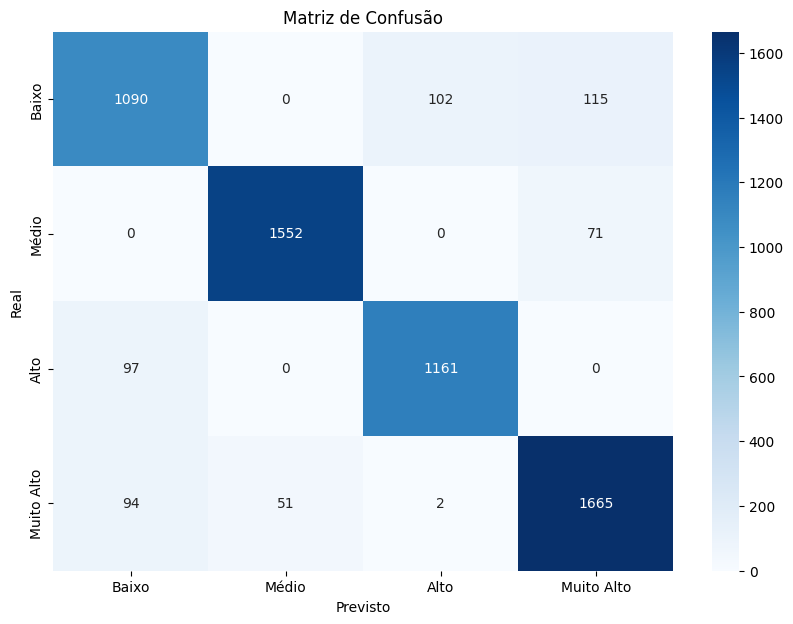

In [62]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = bagging_model2.predict(X_test)

conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Baixo', 'Médio', 'Alto', 'Muito Alto'], yticklabels=['Baixo', 'Médio', 'Alto', 'Muito Alto'])
plt.ylabel('Real')
plt.xlabel('Previsto')
plt.title('Matriz de Confusão')
plt.show()


In [63]:
import pickle
with open('BaggingClassifier.pkl', 'wb') as file:
    pickle.dump(bagging_model2, file)